In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

disease_data = "..\data\Heart_disease.csv"
df_disease = pd.read_csv(disease_data)

# My chosen dataframe was dataframe 2 
df_two = df_disease.drop(columns=["BMI_cat", "bp_category", "height", "weight"])
df_two = pd.get_dummies(df_two, columns=["gender"])
df_two.rename(columns= {"gender_1" : "female", "gender_2" : "male"}, inplace=True)

X,y = df_two.drop("cardio", axis = "columns"), df_two["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

standard_scaler = StandardScaler()
X_train_scaled= standard_scaler.fit_transform(X_train)
X_test_scaled= standard_scaler.transform(X_test)

# Training my chosen dataset and model

My chosen model was a random forest model. These were the scores that it had using the Grid search CV. I have also the best parameters that were evaluated. This was using the standard scaler.

- best score 0.7267866134353808
- best params{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 200}
- best estimator 0.7310872894333844

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(criterion= "entropy", max_features="log2", n_estimators=200)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy after testing on test data  {accuracy}")


Model Accuracy after testing on test data  0.7370999846884091


## 2.5 Ensemble

Voting classifier accuracy:0.735415709692237


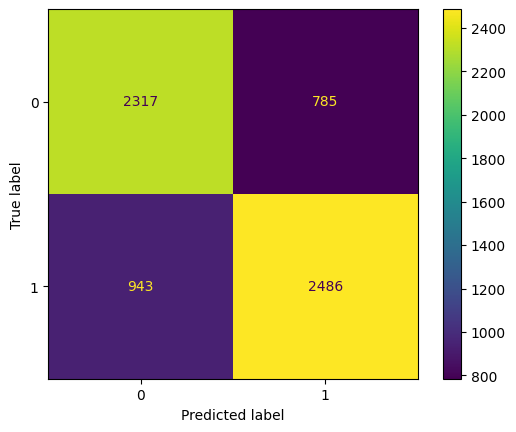

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

model_1 = RandomForestClassifier(criterion= "entropy", max_features="log2", n_estimators=200)
model_2 = LogisticRegression()
model_3 = BernoulliNB()

voting_clf = VotingClassifier(estimators=[("rf", model_1),("lr", model_2), ("bn", model_3)])

voting_clf.fit(X_train_scaled,y_train)

y_pred = voting_clf.predict(X_test_scaled)

print(f"Voting classifier accuracy:{voting_clf.score(X_test_scaled, y_test)}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Confusion matrix on my chosen model

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

y_pred = classifier_log_reg_ss.predict(X_val_scaled)
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()